In [1]:
import pandas as pd

In [5]:
first = pd.read_csv('./lgbmTry.csv')

In [6]:
second = pd.read_csv('./svr_submission_colab.csv')

In [7]:
third = pd.read_csv('./ridge_submission_3.csv')

In [8]:
submission_df = pd.DataFrame(first['id'])
submission_df['price'] = first['price']*0.2 + second['price']*0.4 + third['price']*0.4
submission_df.to_csv('3modelcombo.csv', index=False)

In [9]:
submission_df.head()

,id,price
0,1048243,36.171049
1,86986,47.999659
2,698316,24.060210
3,268868,17.812750
4,1360398,28.356242


In [6]:
third = pd.read_csv('./combinedandsve.csv')

In [7]:
third.head()

,id,price
0,1048243,33.983935
1,86986,49.419554
2,698316,24.185420
3,268868,17.656543
4,1360398,27.368677


In [8]:
third['price'] = 0.97 * third['price']

In [9]:
third.to_csv('0.97_output.csv', index=False)

In [25]:
four = pd.read_csv('./0.95_output.csv')
four.head()

,id,price
0,1048243,32.284738
1,86986,46.948577
2,698316,22.976149
3,268868,16.773715
4,1360398,26.000243


In [10]:
gg1 = pd.read_csv('./stacking5_avg.csv')

In [11]:
gg2 = pd.read_csv('./stackingThree_avg.csv')

In [12]:
gg1['price'] = 0.45 * gg1['price'] + 0.55 *gg2['price']

In [13]:
gg1.to_csv('gg3.csv', index=False)

RMSLE for alpha =  1 is 0.456
RMSLE for alpha =  2 is 0.453
RMSLE for alpha =  2.5 is 0.452
RMSLE for alpha =  3 is 0.454
RMSLE for alpha =  3.5 is 0.454
RMSLE for alpha =  4 is 0.455
RMSLE for alpha =  4.5 is 0.456
RMSLE for alpha =  5 is 0.456
RMSLE for alpha =  6 is 0.457
RMSLE for alpha =  7 is 0.459


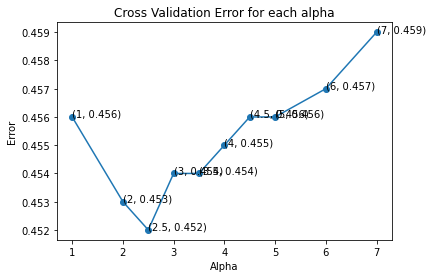

In [3]:
import numpy as np
import matplotlib.pyplot as plt
alpha = [1, 2, 2.5, 3, 3.5, 4, 4.5, 5, 6, 7] 
cv_rmsle_array=[0.456, 0.453, 0.452, 0.454, 0.454, 0.455, 0.456, 0.456, 0.457, 0.459] 

for i in range(len(cv_rmsle_array)):
    print ('RMSLE for alpha = ',alpha[i],'is',cv_rmsle_array[i])
    
best_alpha = np.argmin(cv_rmsle_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_rmsle_array)
ax.scatter(alpha, cv_rmsle_array)
for i, txt in enumerate(np.round(cv_rmsle_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_rmsle_array[i]))

plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha")
plt.ylabel("Error")
plt.show()